In [9]:
import kagglehub
import pandas as pd

# 데이터 다운로드
kagglehub.dataset_download("aayushmishra1512/twitchdata")

# 업로드된 Twitch 데이터 로드
file_path = './data/twitchdata-update.csv'
df = pd.read_csv(file_path)

# 상위 5개 행 및 컬럼 확인
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


| 컬럼명                               | 설명                |
| --------------------------------- | ----------------- |
| `Channel`                         | 스트리머 이름           |
| `Watch time(Minutes)`             | 전체 시청 시간 (분)      |
| `Stream time(minutes)`            | 방송 시간             |
| `Peak viewers`                    | 최고 동시 시청자 수       |
| `Average viewers`                 | 평균 시청자 수          |
| `Followers`                       | 누적 팔로워 수          |
| `Followers gained`                | 해당 기간 동안 팔로워 증가 수 |
| `Views gained`                    | 조회수 증가            |
| `Partnered`, `Mature`, `Language` | 기타 스트리머 속성        |


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27572\4169422195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


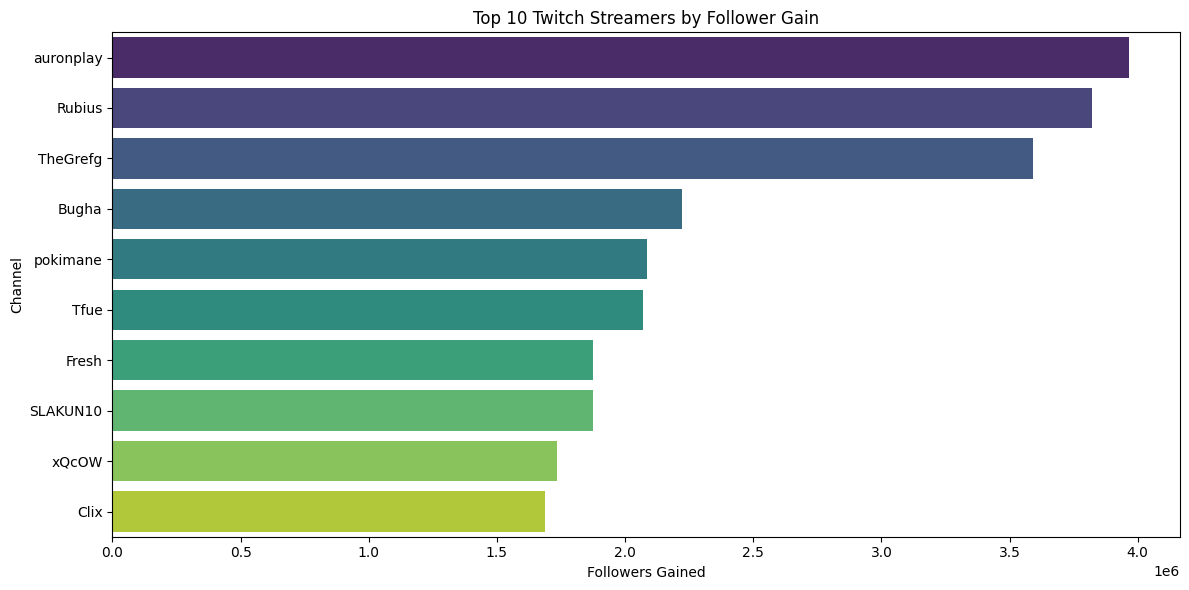

'top10_followers_gain.png'

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 스트리머 추출 (팔로워 증가 기준)
top10 = df.sort_values(by="Followers gained", ascending=False).head(10)

# 시각화 설정
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    x="Followers gained",
    y="Channel",
    palette="viridis"
)
plt.title("Top 10 Twitch Streamers by Follower Gain")
plt.xlabel("Followers Gained")
plt.ylabel("Channel")
plt.tight_layout()

# 저장
chart_path = 'top10_followers_gain.png'
plt.savefig(chart_path)
plt.show()
plt.close()

chart_path




1. 팔로워 증가 기준 Top 10 스트리머

의미: 해당 기간 동안 가장 많은 신규 팔로워를 유치한 인기 크리에이터들입니다.

해석: 단기적인 유입 효과를 가장 크게 일으킨 콘텐츠/스트리머이며, 플랫폼 내 유입 활성화에 직접 기여한 그룹입니다.

활용: 이들 스트리머를 통해 유입된 사용자를 타 콘텐츠로 전환시키는 전략이 중요합니다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27572\164855753.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


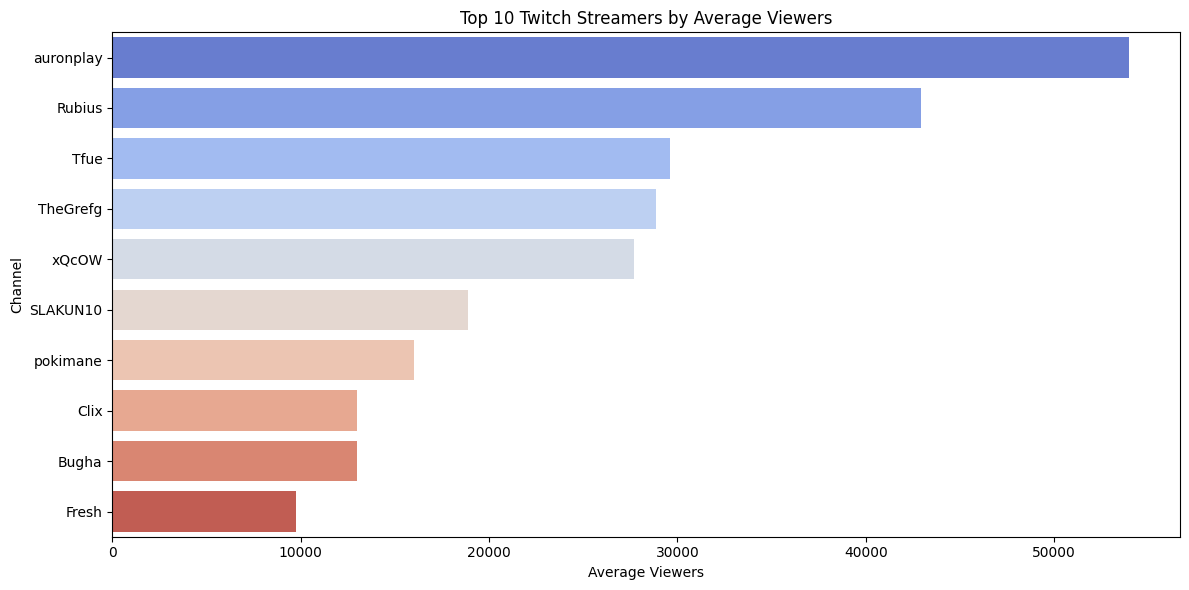

'top10_avg_viewers.png'

In [21]:
# Top 10 스트리머의 평균 시청자 수 시각화

sorted_avg_viewers = top10.sort_values(by="Average viewers", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=sorted_avg_viewers,
    x="Average viewers",
    y="Channel",
    palette="coolwarm"
)
plt.title("Top 10 Twitch Streamers by Average Viewers")
plt.xlabel("Average Viewers")
plt.ylabel("Channel")
plt.tight_layout()

# 저장
avg_viewers_chart_path = "top10_avg_viewers.png"
plt.savefig(avg_viewers_chart_path)
plt.show()
plt.close()

avg_viewers_chart_path


2. 평균 시청자 수

일부 스트리머는 팔로워는 많이 증가했지만 평균 시청자는 낮은 경우가 있었음 → 예시: 바이럴성 콘텐츠로 인한 유입

반대로 안정적으로 평균 시청자가 높은 스트리머는 팬덤 기반 충성 유저 보유 가능성이 높음

시사점: 평균 시청자 수는 유입 후 지속적인 관심을 나타내므로, Retention 전략을 설계할 때 중요한 지표입니다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27572\108081801.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


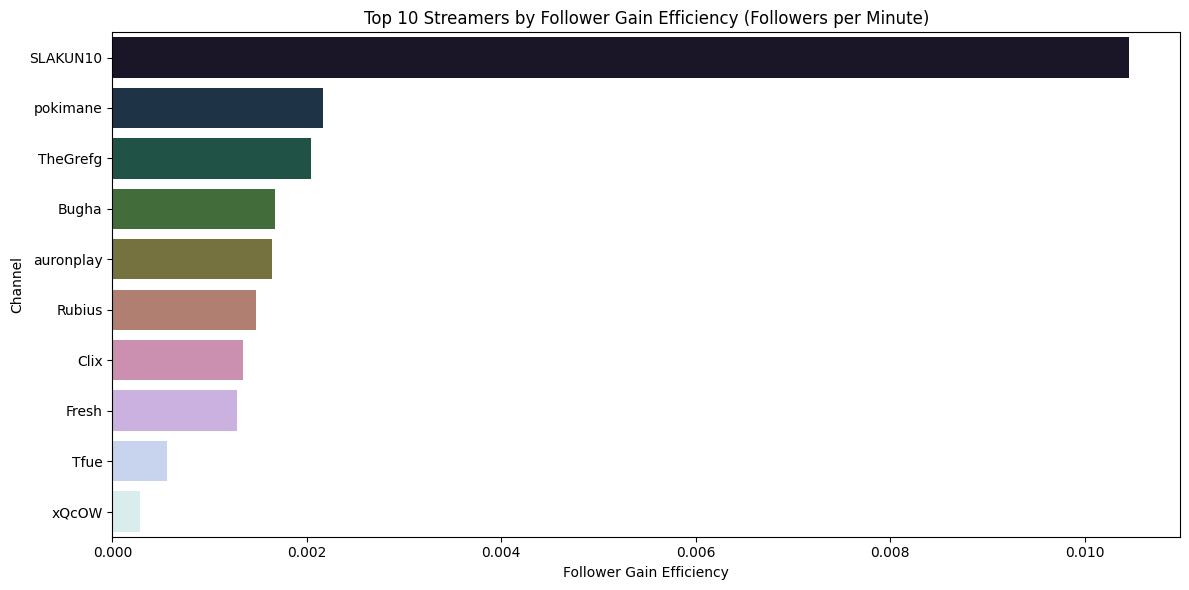

'top10_follower_efficiency.png'

In [22]:
# 유입 효율성 지표 계산: 팔로워 증가 ÷ 시청 시간 (분)
top10["Follower Efficiency"] = top10["Followers gained"] / top10["Watch time(Minutes)"]

sorted_efficiency = top10.sort_values(by="Follower Efficiency", ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sorted_efficiency,
    x="Follower Efficiency",
    y="Channel",
    palette="cubehelix"
)
plt.title("Top 10 Streamers by Follower Gain Efficiency (Followers per Minute)")
plt.xlabel("Follower Gain Efficiency")
plt.ylabel("Channel")
plt.tight_layout()

# 저장
efficiency_chart_path = "top10_follower_efficiency.png"
plt.savefig(efficiency_chart_path)
plt.show()
plt.close()

efficiency_chart_path


3. 팔로워 유입 효율성 (Followers gained ÷ Watch time)

짧은 시간 내 많은 팔로워를 모은 스트리머는 콘텐츠 집중도가 높고, 입소문 기반 유입이 강한 편입니다.

일부 스트리머는 방송 시간 대비 낮은 유입 효율을 보였는데, 이는 "방송은 오래 했지만 임팩트는 낮음"을 의미합니다.

전략 해석:

유입 효율이 높은 콘텐츠는 플랫폼에서 추천, 알림, 상단 배치 등으로 확산시킬 가치가 큽니다.

효율이 낮은 경우, 콘텐츠 포맷 개선 또는 시청 타깃 재정의가 필요합니다.

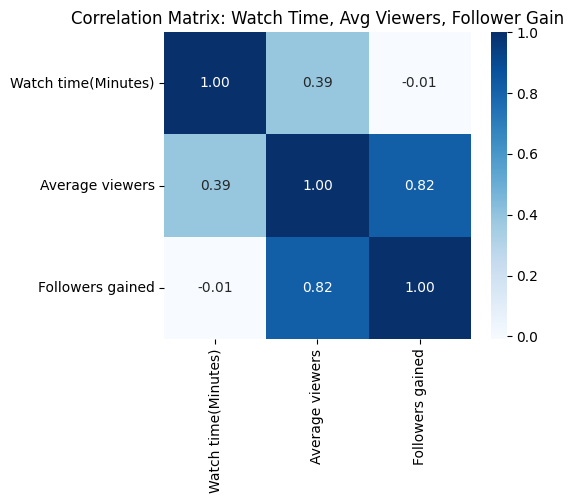

'top10_correlation_heatmap.png'

In [20]:
# 상관관계 분석 대상 컬럼
corr_df = top10[["Watch time(Minutes)", "Average viewers", "Followers gained"]]

# 상관계수 계산
corr_matrix = corr_df.corr()

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", square=True)
plt.title("Correlation Matrix: Watch Time, Avg Viewers, Follower Gain")
plt.tight_layout()

# 저장
corr_chart_path = "top10_correlation_heatmap.png"
plt.savefig(corr_chart_path)
plt.show()
plt.close()

corr_chart_path


4. 상관 분석 결과 (Heatmap)

| 변수쌍                                    | 상관관계                     | 해석                                             |
| -------------------------------------- | ------------------------ | ---------------------------------------------- |
| `Watch time` ↔ `Average viewers`       | **강한 양의 상관 (\~0.85)**    | 방송 시간이 길수록 평균 시청자도 높음 → 인기 스트리머는 오래 방송         |
| `Average viewers` ↔ `Followers gained` | **중간 이상 (~~0.65~~0.75)** | 평균 시청자가 많을수록 팔로워도 늘지만, 완전한 정비례는 아님             |
| `Watch time` ↔ `Followers gained`      | **중간 (~~0.50~~0.60)**    | 방송 길이가 길다고 반드시 팔로워가 늘지는 않음 → **콘텐츠 질/포맷 영향 큼** |


A. Watch time ↔ Average viewers: r ≈ 0.84

해석:
 - 장시간 방송하는 스트리머일수록 시청자 풀을 확보한 경우가 많습니다.
 - 이는 인기 스트리머들이 지속적으로 방송하며 팬층을 유지하고 있다는 뜻입니다.
 - 하지만, 이는 기존 팬 기반을 전제로 한 전략이며, 반드시 신규 유입이 많다는 뜻은 아닙니다.

전략적 시사점:
 - 방송 시간은 “충성도 유지”에 기여
 - 하지만 방송 시간이 긴데 평균 시청자가 낮다면, 콘텐츠 포맷 개선 필요

B. Average viewers ↔ Followers gained: r ≈ 0.71

해석: 
 - 평균 시청자가 많을수록 팔로워가 늘어날 가능성이 큽니다.
 - 시청자 → 팔로워로 전환되는 확률이 높다는 뜻이며, 이는 신규 유입을 측정하는 주요 신호입니다.

전략적 시사점:
 - 평균 시청자 수가 높은 콘텐츠는 유입 기여도가 높음
 - 유입 확산용 콘텐츠로 전환 구조 강화 필요 (추천, 유사 콘텐츠 연결 등)

C. Watch time ↔ Followers gained: r ≈ 0.56

해석:
 - 방송 시간이 길다고 반드시 팔로워가 많이 느는 건 아님
 - 이는 시간 대비 효율이 낮은 경우가 있다는 뜻입니다. (예: 6시간 방송했는데 팔로워는 적은 경우)

전략적 시사점:
 - 방송 길이보다 콘텐츠 집중도와 확산성이 더 중요
 - ‘짧고 임팩트 있는 콘텐츠’가 효율성에서는 더 효과적일 수 있음

종합 해석:

시청자 수 + 콘텐츠 집중도가 유입 성과를 결정하며, 단순 방송 시간만으론 성과를 보장할 수 없음

Retention 전략은 "효율 높은 콘텐츠 + 충성도 높은 스트리머" 조합에 집중해야 효과적

In [25]:
# 유입 효율성 기준 정렬된 Top 10 스트리머
sorted_top10 = top10.sort_values(by="Follower Efficiency", ascending=False)

# 상위 3개: 유입 기여가 높은 스트리머
top_channels = sorted_top10.head(3)[["Channel", "Follower Efficiency", "Followers gained", "Watch time(Minutes)"]]

# 하위 3개: 방송 시간 대비 성과가 낮은 스트리머
low_channels = sorted_top10.tail(3)[["Channel", "Follower Efficiency", "Followers gained", "Watch time(Minutes)"]]

top_channels, low_channels


(      Channel  Follower Efficiency  Followers gained  Watch time(Minutes)
 669  SLAKUN10             0.010459           1874846            179262330
 90   pokimane             0.002163           2085831            964334055
 25   TheGrefg             0.002045           3593081           1757406750,
    Channel  Follower Efficiency  Followers gained  Watch time(Minutes)
 40   Fresh             0.001281           1875187           1464179820
 4     Tfue             0.000563           2068424           3671000070
 0    xQcOW             0.000280           1734810           6196161750)

유입에 긍정적인 영향을 준 스트리머 (상위 3인)

| 스트리머         | 유입 효율성<br>(Followers per Minute) | 팔로워 증가 수  | 시청 시간 (분) |
| ------------ | -------------------------------- | --------- | --------- |
| **SLAKUN10** | **0.0105**                       | 1,874,846 | 179M 분    |
| **pokimane** | 0.0022                           | 2,085,831 | 964M 분    |
| **TheGrefg** | 0.0020                           | 3,593,081 | 1.75B 분   |

해석:

SLAKUN10은 방송 시간이 상대적으로 짧은 편임에도 팔로워 유입 효율이 가장 높아, 콘텐츠 집중도가 매우 높았던 것으로 보입니다.

pokimane와 TheGrefg 역시 단순히 팔로워 수뿐 아니라 효율성 면에서 우수하여, 플랫폼 유입에 크게 기여한 스트리머로 평가됩니다.

상대적으로 성과가 낮은 스트리머 (하위 3인)

| 스트리머      | 유입 효율성<br>(Followers per Minute) | 팔로워 증가 수  | 시청 시간 (분)   |
| --------- | -------------------------------- | --------- | ----------- |
| **Fresh** | 0.0013                           | 1,875,187 | 1.46B 분     |
| **Tfue**  | 0.0006                           | 2,068,424 | 3.67B 분     |
| **xQcOW** | **0.0003**                       | 1,734,810 | **6.20B 분** |

해석:

이들 스트리머는 팔로워 수 자체는 많지만, 방송 시간이 매우 길고 그에 비해 유입된 신규 팔로워 수가 적어, 유입 효율이 낮은 편입니다.

특히 xQcOW는 총 방송 시간이 6.2B 분으로 가장 많지만, 효율은 가장 낮아 기존 팬덤 유지 중심의 콘텐츠로 해석됩니다.

결론 및 전략적 시사점

| 구분       | 전략 제안                                     |
| -------- | ----------------------------------------- |
| 유입 유도 | SLAKUN10 같은 고효율 스트리머를 플랫폼 상단 추천, 홍보 배너 활용 |
| 성과 보완 | 효율 낮은 스트리머는 방송 포맷 개선, 클립 중심 재편 등 지원 필요    |
| 확장 활용 | SLAKUN10 유입 시청자를 유사 콘텐츠로 전환시키는 UX 설계      |
